# Understanding deep learning by convolutional neural network

In [21]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [8]:
#Loading the trained model
model_path='model/model.npy'
model = np.load(model_path, encoding = 'latin1').item()

Shape of first layer: (9, 9, 1, 64)
Number of filters: 64
Size of filters: 9x9
Value of 1st filter:
Value of 10th bias:
-0.000116358
Visualise 1st filter:


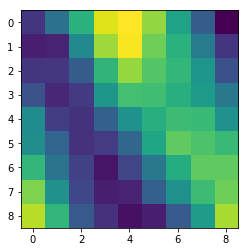

In [43]:
# init = tf.global_variables_initializer()

#Parsing the weights of the first convolutional layer
w1 = model['w1']
b1 = model['b1']

print('Shape of first layer: ' + str(w1.shape))
print('Number of filters: ' + str(w1.shape[3]))
print('Size of filters: ' + str(w1.shape[0]) + 'x' + str(w1.shape[1]))
print('Value of 1st filter:')
# print(w1[:,:,:,0])
print('Value of 10th bias:')
print(b1[9])
print('Visualise 1st filter:')
filt =w1[:,:,:,0]
filt = np.reshape(filt, (9,9))
plt.imshow(filt)
plt.show()


In [45]:
#Parsing the weights of the second convolutional layer
w2 = model['w2']
b2 = model['b2']

print('Shape of second layer: ' + str(w2.shape))
print('Number of filters: ' + str(w2.shape[3]))
print('Size of filters: ' + str(w2.shape[0]) + 'x' + str(w2.shape[1]))
print('Value of 5th filter:')
# print(w2[:,:,:,4])
print('Value of 6th bias:')
print(b1[5])

Shape of second layer: (1, 1, 64, 32)
Number of filters: 32
Size of filters: 1x1
Value of 5th filter:
Value of 6th bias:
0.000197887


Shape of third layer: (5, 5, 32, 1)
Number of filters: 1
Size of filters: 5x5
Value of 1st filter:
Value of 1st bias:
0.0907501
Visualise 1st filter:


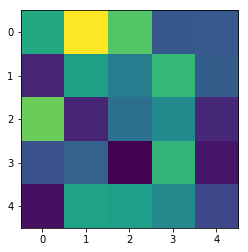

In [56]:
#Parsing the weights of the third convolutional layer
w3 = model['w3']
b3 = model['b3']

print('Shape of third layer: ' + str(w3.shape))
print('Number of filters: ' + str(w3.shape[3]))
print('Size of filters: ' + str(w3.shape[0]) + 'x' + str(w3.shape[1]))
print('Value of 1st filter:')
# print(w3[:,:,:,0])
print('Value of 1st bias:')
print(b3[0])
print('Visualise 1st filter:')
plt.imshow(w3[:,:,0,0])
plt.show()

In [57]:
#Matrix operations
v = [1, 2, 3, 4]
v = np.asarray(v)
v = np.reshape(v, (-1, 2))
v += 2
v2 = v
v3 = v + v2
v3

array([[ 6,  8],
       [10, 12]])

In [58]:
#Performn a 2d convolution on a 2d matrix with a given filter
import imageio
init = tf.global_variables_initializer()

butterfly_image = "butterfly_GT.bmp"
image = np.array(imageio.imread(butterfly_image, flatten=False))
#Just take one channel to make 2d
image = image[:,:,0].astype(np.float32)
fil = tf.Variable(tf.random_normal([9, 9, 1, 1], stddev=1e-3, seed=1), name='filter')
image = tf.Variable(tf.random_normal([9, 9, 1, 1], stddev=1, seed=1, mean=10), name='filter')
conv = tf.nn.conv2d(input=image,filter=fil, strides = [1,1,1,1], padding = 'SAME')
conv = tf.nn.relu(conv)
sess = tf.Session()
sess.run(init)
a = conv
sess.close()

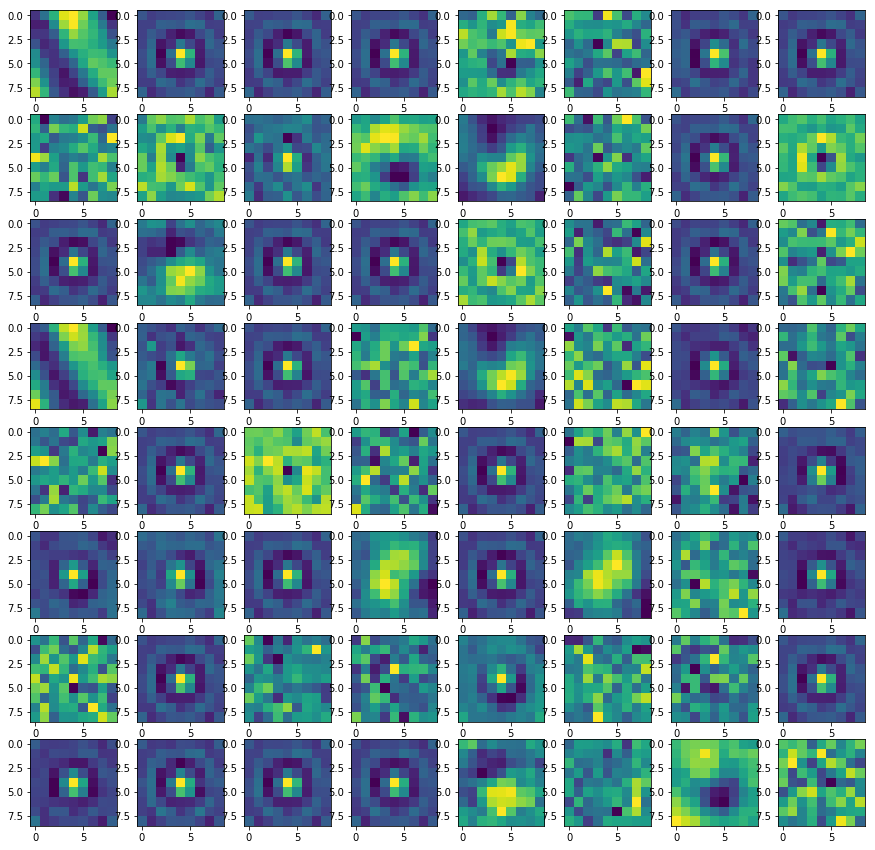

In [72]:
plt.figure(figsize=(15,15))
for i in range(w1.shape[3]):
    filt =w1[:,:,:,i]
    filt = np.reshape(filt, (9,9))
    plt.subplot(8,8,i+1)
    plt.imshow(filt)
#     print("Filt #:" + str(i))
plt.show()

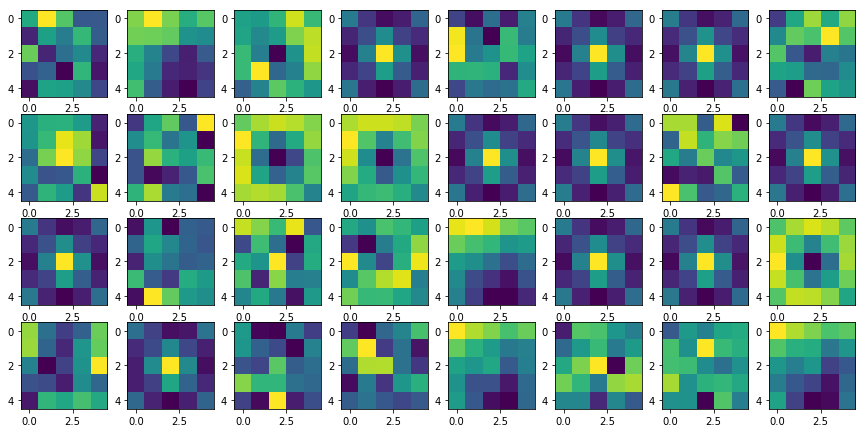

In [78]:
plt.figure(figsize=(15,15))
for i in range(w3.shape[2]):
    filt =w3[:,:,i]
    filt = np.reshape(filt, (5,5))
    plt.subplot(8,8,i+1)
    plt.imshow(filt)
plt.show()